# Package loading and basic configurations

In [15]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of "dortmund" (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column.

### Changes:
Bounding box are taken for Dortmund.

In [33]:
bbox = BboxSelector([7.438173,
                     51.505323,
                     7.496066,
                     51.522016
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Rpm.value,Rpm.unit,Speed.value,Speed.unit,GPS Accuracy.value,GPS Accuracy.unit,GPS Altitude.value,...,sensor.engineDisplacement,sensor.model,sensor.id,sensor.fuelType,sensor.constructionYear,sensor.manufacturer,O2 Lambda Current.value,O2 Lambda Current.unit,O2 Lambda Current ER.value,O2 Lambda Current ER.unit
0,5778dd84e4b0ea2464335ce2,2016-06-28T20:23:19,POINT (7.46679 51.51764),688.115800,u/min,0.000000,km/h,8.627219,%,137.000000,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
1,5778dd84e4b0ea2464335ce4,2016-06-28T20:23:24,POINT (7.46674 51.51767),680.632932,u/min,0.000000,km/h,10.000000,%,135.000004,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
2,5778dd84e4b0ea2464335ce5,2016-06-28T20:23:29,POINT (7.46685 51.51763),1415.100766,u/min,15.692829,km/h,10.574426,%,131.148851,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
3,5778dd84e4b0ea2464335ce6,2016-06-28T20:23:34,POINT (7.46736 51.51746),1536.539431,u/min,30.760125,km/h,5.501984,%,129.498016,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
4,5778dd84e4b0ea2464335ce7,2016-06-28T20:23:40,POINT (7.46785 51.51726),1280.871960,u/min,25.000000,km/h,7.000000,%,128.000004,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,5778dd70e4b0ea2464335576,2016-06-28T17:03:10,POINT (7.46739 51.51724),794.846166,u/min,2.785820,km/h,5.000000,%,134.478392,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
941,5778dd70e4b0ea2464335577,2016-06-28T17:03:15,POINT (7.46742 51.51724),788.837674,u/min,3.000000,km/h,5.536853,%,136.000000,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
942,5778dd70e4b0ea2464335578,2016-06-28T17:03:20,POINT (7.46744 51.51727),710.400021,u/min,0.000000,km/h,10.736527,%,131.842319,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN
943,5778dd70e4b0ea2464335579,2016-06-28T17:03:25,POINT (7.46745 51.51730),806.395580,u/min,3.000000,km/h,21.087649,%,129.999996,...,1398,Corsa,54ce231ee4b0887704ef7335,gasoline,2013,Opel,NaN,NaN,NaN,NaN


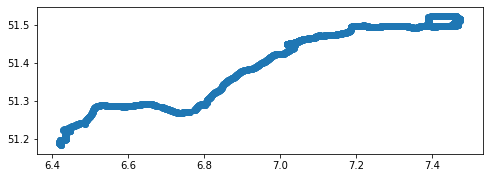

In [34]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

### Changes:
plotting the Histogram of data frame
and making the scatter plot for the speed and Rpm

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E2D3712BC8>,
      dtype=object)

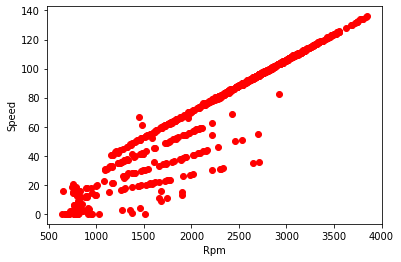

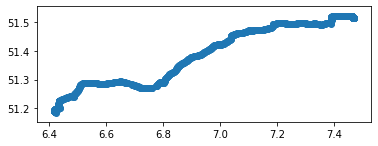

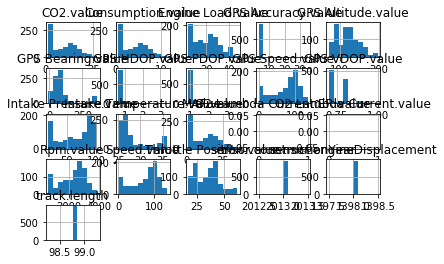

In [35]:
some_track_id = track_df['track.id'].unique()[2]
some_track = track_df[track_df['track.id'] == some_track_id]
x=some_track['Rpm.value']
y=some_track['Speed.value']
plt.scatter(x, y, c='r')
plt.xlabel('Rpm')
plt.ylabel('Speed')
some_track.plot()
some_track.hist()



### Summary:
Maximum and minimum values of speed are found.

135.999996

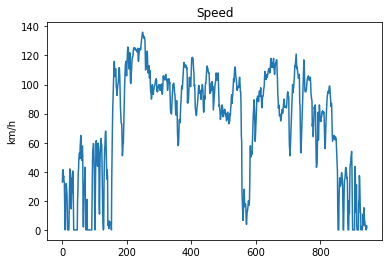

In [36]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax
mx=max(some_track['Speed.value'])
mx
mn=min(some_track['Speed.value'])
mn
mx

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [37]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [38]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state #, mapbox_key=<mapbox-key-here>
)
r.to_html('tracks_muenster.html', iframe_width=900)

C:\Users\Welcome\anaconda3\lib\site-packages\pydeck\bindings\deck.py:88: UserWarning: Mapbox API key is not set. This may impact available features of pydeck.
  UserWarning,


'C:\\Users\\Welcome\\tracks_muenster.html'